In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


## Data Reading/EDA 

In [3]:
data = pd.read_csv('Data/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [5]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


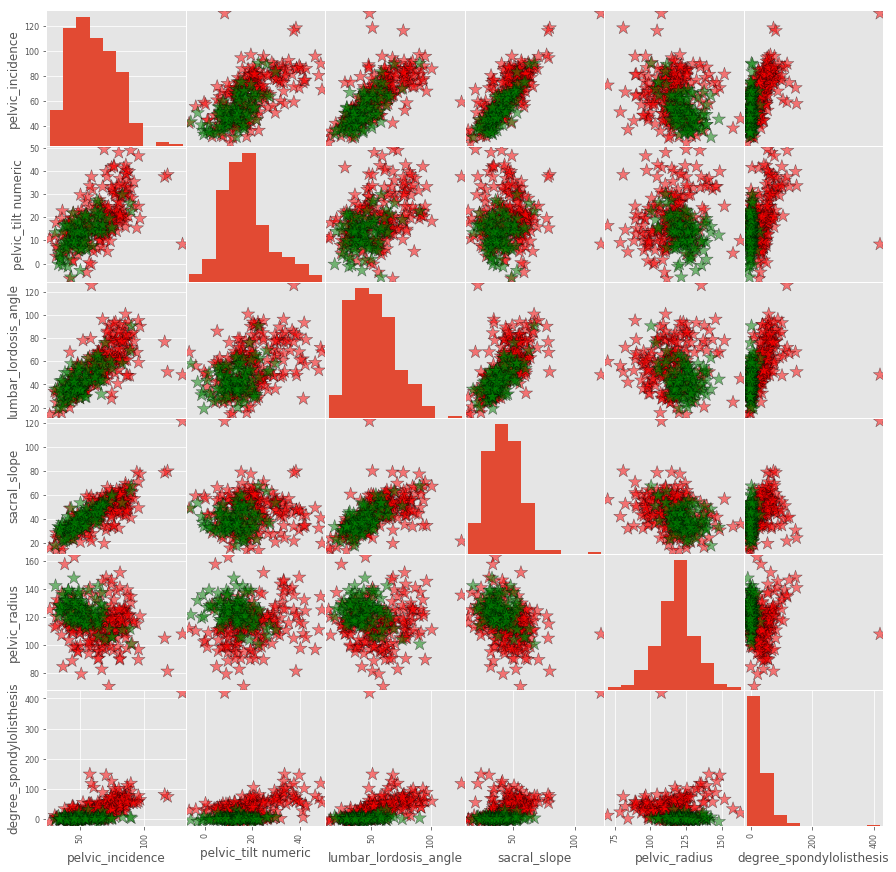

In [6]:
color_list = ['red' if i == 'Abnormal' else 'green' for i in data.loc[:, 'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c = color_list,
                                       figsize = [15,15],
                                       diagonal = 'hist',
                                       alpha=.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor = 'black')
plt.show()

In [7]:
# How balanced are the data? 

sns.countplot(x='class', data=data) # I don't know how to make this display.
data.loc[:, 'class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

## KNN Classifier 

In [8]:
# One of the simplest predictive models we can build is a KNN, which predicts
# one the basis of the K nearest neighbors. 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x,y = data.loc[:, data.columns != 'class'], data.loc[:, 'class']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = .3, random_state = 1)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
# prediction = knn.predict(x)
print('With KNN (K=3) accuracy is: ', knn.score(X_test, y_test))

With KNN (K=3) accuracy is:  0.8602150537634409


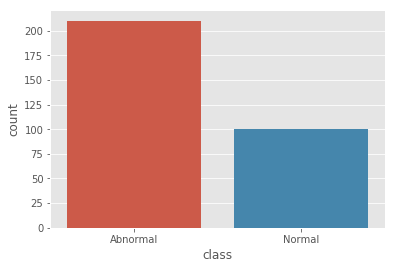

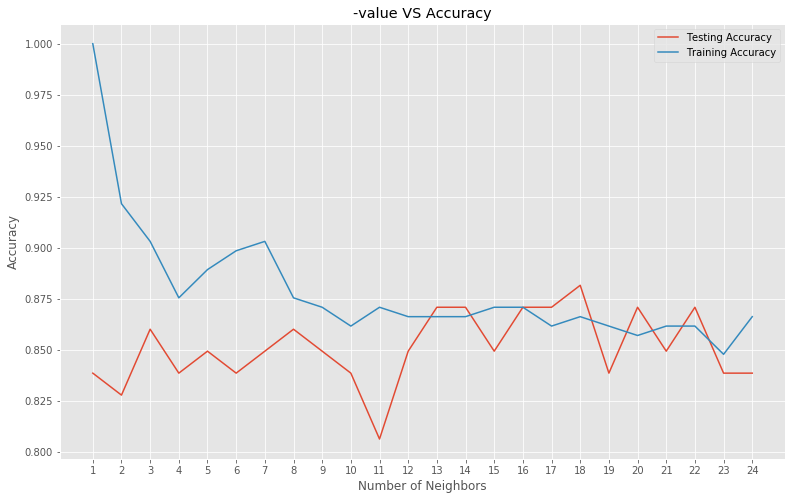

Best accuracy is 0.8817204301075269 with K = 18


In [9]:
neigh = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i,k in enumerate(neigh):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.figure(figsize = [13,8])
plt.plot(neigh, test_accuracy, label = 'Testing Accuracy')
plt.plot(neigh, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neigh)
plt.show()

print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),
                                        1+test_accuracy.index(np.max(test_accuracy))))

## Linear Regression 

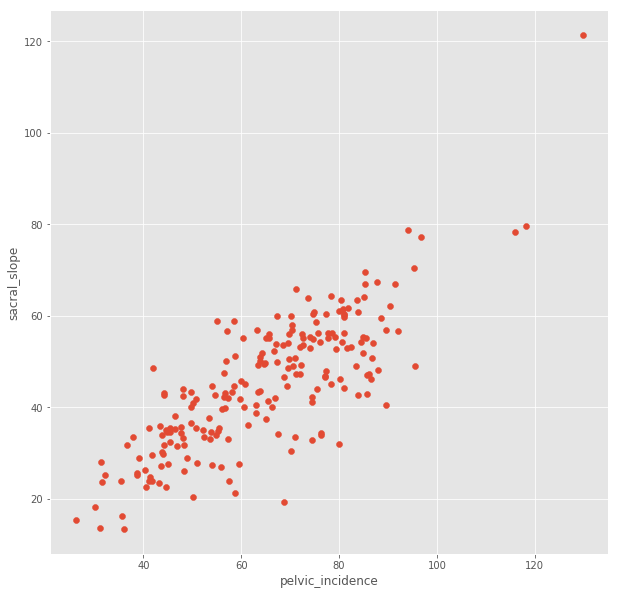

In [10]:
## LINEAR REGRESSION 

data1 = data[data['class'] == 'Abnormal']
x1 = np.array(data1.loc[:, 'pelvic_incidence']).reshape(-1,1)
y1 = np.array(data1.loc[:, 'sacral_slope']).reshape(-1,1)

plt.figure(figsize = [10,10])
plt.scatter(x = x1, y = y1)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

predict_space = np.linspace(min(x1), max(x1)).reshape(-1,1)
reg.fit(x1,y1)
predicted = reg.predict(predict_space) # What's the purpose of this?
print('R**2 score: ', reg.score(x1,y1))

R**2 score:  0.6458410481075871


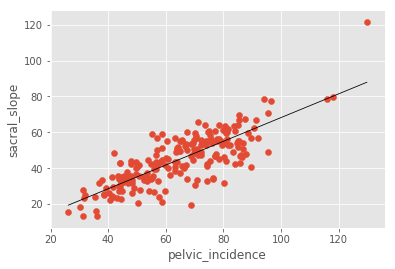

In [12]:
plt.plot(predict_space, predicted, color='black', linewidth = .8)
plt.scatter(x=x1, y=y1)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [13]:
from sklearn.model_selection import cross_val_score

k = 5

cv_result = cross_val_score(reg, x1, y1, cv=k)
print('CV Scores: ', cv_result)
print('CV scores average: ', np.sum(cv_result)/k)

CV Scores:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV scores average:  0.3931462502884867


### Ridge Regression 

In [14]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 2, test_size = 0.3)

ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train, y_train)
ridge_predict = ridge.predict(X_test)
print('Ridge score: ',ridge.score(X_test,y_test))

ValueError: could not convert string to float: 'Normal'

In [15]:
data['class']

0      Abnormal
1      Abnormal
2      Abnormal
3      Abnormal
4      Abnormal
5      Abnormal
6      Abnormal
7      Abnormal
8      Abnormal
9      Abnormal
10     Abnormal
11     Abnormal
12     Abnormal
13     Abnormal
14     Abnormal
15     Abnormal
16     Abnormal
17     Abnormal
18     Abnormal
19     Abnormal
20     Abnormal
21     Abnormal
22     Abnormal
23     Abnormal
24     Abnormal
25     Abnormal
26     Abnormal
27     Abnormal
28     Abnormal
29     Abnormal
         ...   
280      Normal
281      Normal
282      Normal
283      Normal
284      Normal
285      Normal
286      Normal
287      Normal
288      Normal
289      Normal
290      Normal
291      Normal
292      Normal
293      Normal
294      Normal
295      Normal
296      Normal
297      Normal
298      Normal
299      Normal
300      Normal
301      Normal
302      Normal
303      Normal
304      Normal
305      Normal
306      Normal
307      Normal
308      Normal
309      Normal
Name: class, Length: 310

### Lasso Regression 

In [16]:
# Lasso

from sklearn.linear_model import Lasso

x = np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 3, test_size = .3)

lasso = Lasso(alpha = .1, normalize = True)
lasso.fit(X_train, y_train)
lasso_predict = lasso.predict(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [210, 310]

## Random Forest Classifier 

### (And confusion matrix) 

In [17]:
# Let's work with a confusion matrix and a random forest classifier. 

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.ensemble import RandomForestClassifier 

x,y = data.loc[:, data.columns != 'class'], data.loc[:, 'class']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state = 1)

rf = RandomForestClassifier(random_state = 4)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
print('Classification Report: \n', classification_report(y_test,y_pred))

Confusion Matrix: 
 [[58  8]
 [ 7 20]]
Classification Report: 
               precision    recall  f1-score   support

    Abnormal       0.89      0.88      0.89        66
      Normal       0.71      0.74      0.73        27

   micro avg       0.84      0.84      0.84        93
   macro avg       0.80      0.81      0.81        93
weighted avg       0.84      0.84      0.84        93



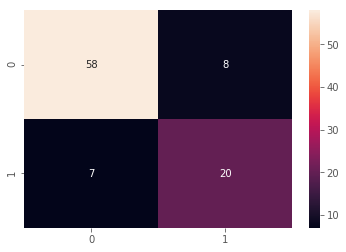

In [18]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## Logistic Regression 

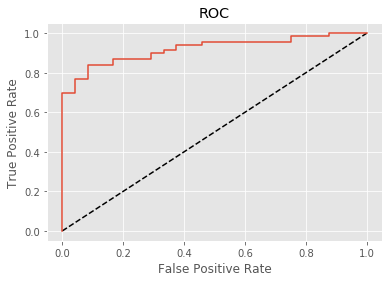

In [20]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression 

data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:, 'class']]
x,y = data.loc[:, (data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:, 'class_binary']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state = 42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

## Grid Search

In [22]:
# We'll use GridSearch to do a validation test on a KNN model. 

from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3)
knn_cv.fit(x,y)

print('Tuned hyperparameters: {}'.format(knn_cv.best_params_))
print('Best score: {}'.format(knn_cv.best_score_))

Tuned hyperparameters: {'n_neighbors': 4}
Best score: 0.7548387096774194


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [23]:
# We're going to use grid search to cross validate two hyperparameters,
# the first being C: logreg regularization parameter, and the second 
# being the l1 or l2 penalty. 

param_grid = {'C': np.logspace(-3,3,7), 'penalty': ['l1','l2']}
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=3)
logreg_cv.fit(X_train, y_train)

print("Tuned hyperparameters: {}".format(logreg_cv.best_params_))
print("Best accuracy: {}".format(logreg_cv.best_score_))

Tuned hyperparameters: {'C': 100.0, 'penalty': 'l2'}
Best accuracy: 0.8525345622119815


## Pre-processing Data 

There's a great deal of preprocessing we could be doing here, one of which is making 'dummy variables' to take the place of 'Abnormal' and 'Normal' classifications. 

In [34]:
df = pd.get_dummies(data, drop_first=True)

In [24]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('scalar', StandardScaler()), ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C': [1,10,100],
              'SVM__gamma': [.1, .01]}
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state =1)
cv = GridSearchCV(pipeline, param_grid = parameters, cv=3)
cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

print("Accuracy: {}".format(cv.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8548387096774194
Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Unsupervised Learning

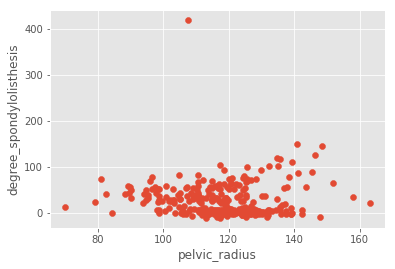

In [25]:
# We'll simulate unsupervised learning by dropping some of the target 
# labels and just focus on two features. 

plt.scatter(data['pelvic_radius'], data['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

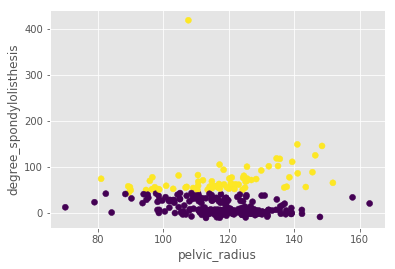

In [28]:
from sklearn.cluster import KMeans

data2 = data.loc[:, ['degree_spondylolisthesis', 'pelvic_radius']]
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data['pelvic_radius'], data['degree_spondylolisthesis'], c=labels)
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()


In [29]:
# We can evaluate this clustering by looking at a cross-tabulation table,
# which gives us a sense of what these clusters mean. Since we have the 
# real, labeled data, we can sort of eyeball evaluate our algorithm's 
# performance. 

df = pd.DataFrame({'labels': labels, 'class':data['class']})
ct = pd.crosstab(df['labels'], df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            138     100
1             72       0


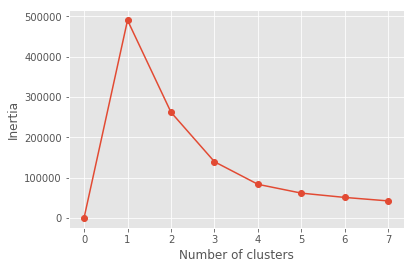

In [33]:
# Of course we often won't have any idea how many clusters there actually 
# should be, so we have to turn to various other metrics to determine 
# how well our clustering has gone. 

# METHOD ONE: Inertia 

inertia_list = np.empty(8)

for i in range(1,8):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_ # iiiiinteresting. 

plt.plot(range(0,8), inertia_list, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Standardization 

In [42]:
data = pd.read_csv('Data/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
data3 = data.drop('class', axis=1)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar, kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)

df = pd.DataFrame({'labels': labels, 'class': data['class']})
ct = pd.crosstab(df['labels'], df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            114      10
1             96      90


### Hierarchy 

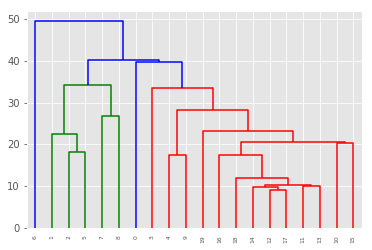

In [45]:
# We can use tools from scipy to gauge distances between clusters and nodes. 

from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(data3.iloc[200:220, :], method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

### T-Distributed Stochastic Neighbor Embedding (T-SNE) 

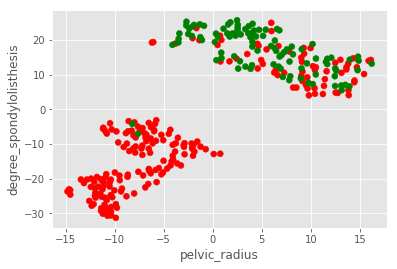

In [51]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate = 100)
transformed = model.fit_transform(data2)

x = transformed[:, 0]
y = transformed[:, 1]

plt.scatter(x,y,c = color_list)
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

### PCA  

In [52]:
# This is a foundational dimensionality reduction technique. 

from sklearn.decomposition import PCA 
 
pca_mod = PCA()
pca_mod.fit(data3)
transformed = pca_mod.transform(data3)
print('Principled components: ', pca_mod.components_)

Principled components:  [[ 3.23645647e-01  1.13192291e-01  3.03674740e-01  2.10453357e-01
  -2.99598300e-02  8.63153779e-01]
 [-4.76634849e-01 -9.85632787e-02 -5.32783979e-01 -3.78071570e-01
   3.21809199e-01  4.82438036e-01]
 [-1.54481282e-03 -2.64657410e-01 -4.96541893e-01  2.63112598e-01
  -7.74612852e-01  1.18940778e-01]
 [ 3.73677251e-01  7.54113757e-01 -3.39411757e-01 -3.80436506e-01
  -1.75106042e-01 -3.29143086e-02]
 [-4.41703869e-01  7.35414748e-02  5.12024113e-01 -5.15245344e-01
  -5.14639730e-01  8.35992525e-02]
 [ 5.77350269e-01 -5.77350269e-01 -1.08930072e-11 -5.77350269e-01
  -3.59059872e-12  3.06729795e-12]]


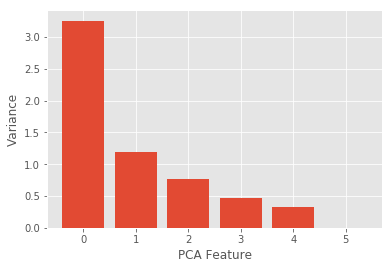

In [55]:
# Of course this isn't all that helpful, let's see if we can't get this 
# into a more human-meaningful format. 

scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(data3)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.show()

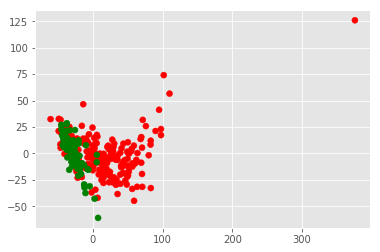

In [56]:
# Now let's apply the PCA 

pca = PCA(n_components = 2)
pca.fit(data3)
transformed = pca.transform(data3)

x = transformed[:, 0]
y = transformed[:, 1]

plt.scatter(x,y,c = color_list)
plt.show()